## 5.2 Exercise: Build your own Sentiment Analysis Model

#### 1. Get the stemmed data using the same process you did in Week 3.

In [7]:
import pandas as pd
#reading data from csv file
df = pd.read_csv("labeledTrainData.tsv", sep = "\t")

#converting review text to lower cases
df["review"] = df["review"].str.lower()

#removjing punctuations
import re
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
df["review"] = df["review"].apply(remove_punctuation)

#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)
df['review'] = df['review'].apply(remove_stopwords)

#stemming data
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemm(text):
    return ' '.join(stemmer.stem(word) for word in text.split())
df['review'] = df['review'].apply(stemm)

#### 2. Split this into a training and test set.

In [10]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 3. Fit and apply the tf-idf vectorization to the training set.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train2 = tfidf.fit_transform(X_train)

#### 4. Apply but do not fit the tf-idf vectorization to the tets set (Why?).
We want to fit the tf-idf vectorization to the training set only and then we will apply it on tets set, because test set will be used for evaluation the performance of sentiment analysis model so we don't want to leak it.

In [14]:
X_test2 = tfidf.transform(X_test)

#### 5. Train a logistic regression model using the training data.

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train2, y_train)

LogisticRegression()

#### 6. Find the model accuracy on the test set.

In [23]:
from sklearn.metrics import accuracy_score
log_reg_preds = log_reg.predict(X_test2)
log_reg_acc = accuracy_score(y_test, log_reg_preds)
print("Logistic Regression Model Accuracy:",round(log_reg_acc, 4))

Logistic Regression Model Accuracy: 0.8845


#### 7. Create a confusion matrix for test set predictions.

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg_preds)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[3262  476]
 [ 390 3372]]


#### 8. Get the precision, recall and F1-score for the test set predictions.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
log_precision = precision_score(y_test, log_reg_preds)
log_recall = recall_score(y_test, log_reg_preds)
log_f1 = f1_score(y_test, log_reg_preds)
print("Logistic Regression Precision:", round(log_precision, 4))
print("Logistic Regression Recall:", round(log_recall, 4))
print("Logistic Regression F1-score:", round(log_f1, 4))

Logistic Regression Precision: 0.8763
Logistic Regression Recall: 0.8963
Logistic Regression F1-score: 0.8862


#### 9. Create a ROC curve for the test set.

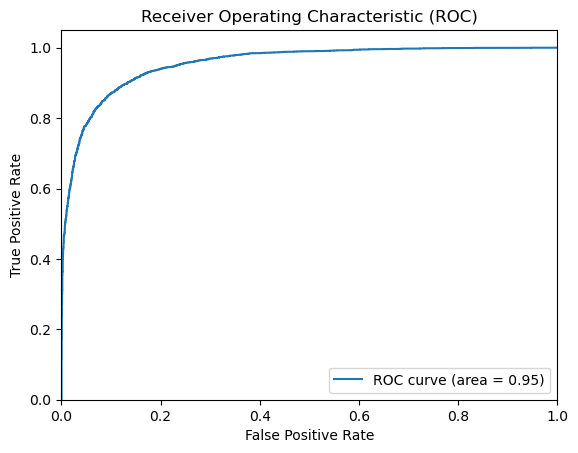

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score = log_reg.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score[:,1]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### 10. Pick another classification model you learned about this week and repeat steps (5) - (9).

In [41]:
#fitting naive bayes classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train2, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
#accuracy of decsiion tree model
dt_pred = dt.predict(X_test2)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", round(dt_acc, 4))

Decision Tree Classifier Accuracy: 0.7087


In [43]:
#precision, recall and f1_score
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print("Decision Tree Precision:", round(dt_precision, 4))
print("Decision Tree Recall:", round(dt_recall, 4))
print("Decision Tree F1-score:", round(dt_f1, 4))

Decision Tree Precision: 0.7124
Decision Tree Recall: 0.7031
Decision Tree F1-score: 0.7077


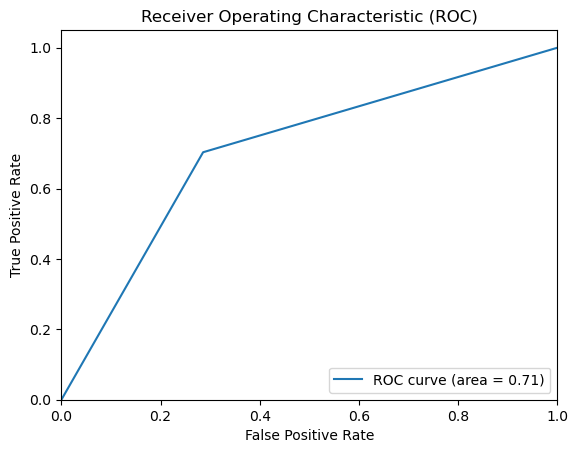

In [44]:
#roc curve for decision tree classifier
y_score = dt.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_score[:,1]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()